# Preparing the necessary libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
68986,Female,49.0,0,0,No Info,27.32,5.8,160,0
14985,Male,44.0,0,0,never,30.80,5.8,126,0
56792,Female,20.0,0,0,never,22.42,6.2,145,0
17495,Male,26.0,0,0,never,26.85,3.5,126,0
40079,Female,34.0,0,0,former,20.09,6.6,126,0
90893,Female,40.0,0,0,No Info,27.32,6.0,159,0
41200,Male,3.0,0,0,No Info,15.54,6.6,130,0
66585,Male,80.0,0,0,No Info,27.32,9.0,220,1
50124,Male,52.0,0,0,current,39.18,6.6,80,0
96698,Male,15.0,0,0,never,24.18,5.8,140,0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [6]:
df = df[df['gender'] != 'Other']

In [7]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df.duplicated().sum()

3854

In [10]:
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [12]:
df_sorted_by_age = df.sort_values(by='age', ascending=True)

In [13]:
df['age'] = df['age'].apply(lambda x: math.ceil(x))

C:\Users\User01\AppData\Local\Temp\ipykernel_11840\2078948043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].apply(lambda x: math.ceil(x))


In [14]:
#df.mean()

In [15]:
def outlier(df, column_name, diabetes_value=0):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_filtered = df.copy()

    # Filter the DataFrame to keep only non-diabetes records
    df_non_diabetes = df_filtered[df_filtered['diabetes'] == diabetes_value]

    # Calculate the upper and lower bounds for outlier removal for non-diabetes records
    upper = df_non_diabetes[column_name].mean() + df_non_diabetes[column_name].std() * 3
    lower = df_non_diabetes[column_name].mean() - df_non_diabetes[column_name].std() * 3

    # Apply outlier removal on the non-diabetes records only
    df_filtered = df_filtered[
        ~((df_filtered['diabetes'] == diabetes_value) & ((df_filtered[column_name] > upper) | (df_filtered[column_name] < lower)))
    ]

    return df_filtered


In [16]:
df = outlier(df, 'age')

In [17]:
df = outlier(df, 'bmi')

In [18]:
df = outlier(df, 'HbA1c_level')

In [19]:
df = outlier(df, 'blood_glucose_level')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95062 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95062 non-null  object 
 1   age                  95062 non-null  int64  
 2   hypertension         95062 non-null  int64  
 3   heart_disease        95062 non-null  int64  
 4   smoking_history      95062 non-null  object 
 5   bmi                  95062 non-null  float64
 6   HbA1c_level          95062 non-null  float64
 7   blood_glucose_level  95062 non-null  int64  
 8   diabetes             95062 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 7.3+ MB


In [21]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,95062.000000,95062.000000,95062.000000,95062.000000,95062.000000,95062.000000,95062.000000
mean,41.799457,0.077065,0.040973,27.046547,5.534421,138.283078,0.089226
std,22.519173,0.266697,0.198229,6.255995,1.073958,40.975096,0.285071
min,1.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.330000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.620000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [22]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36,0,0,No Info,24.60,4.8,145,0
99996,Female,2,0,0,No Info,17.37,6.5,100,0
99997,Male,66,0,0,former,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


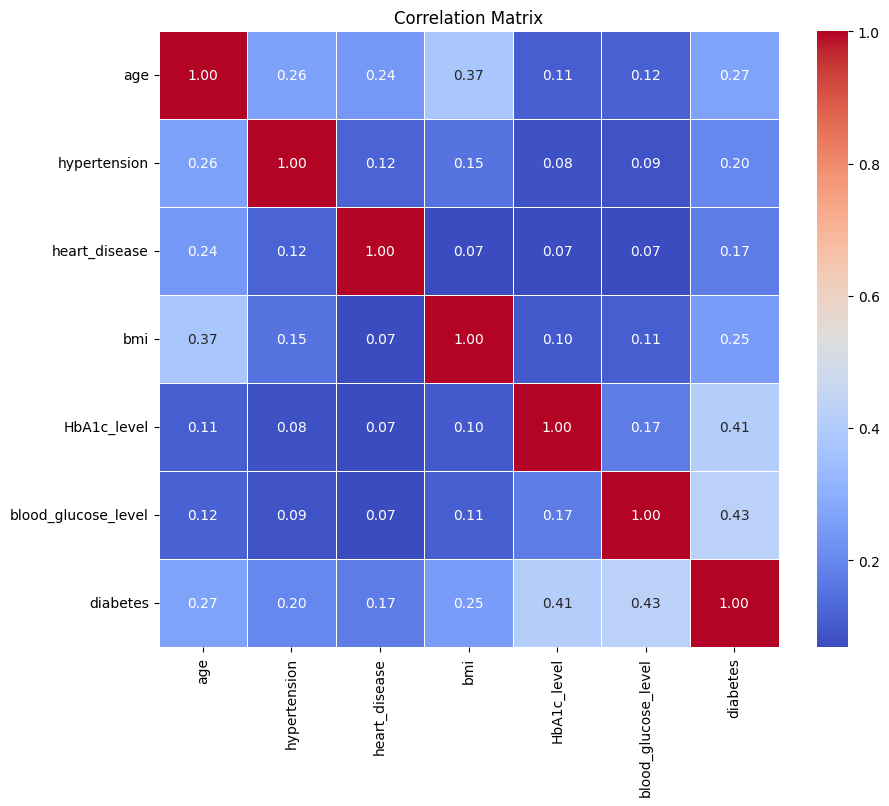

In [23]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

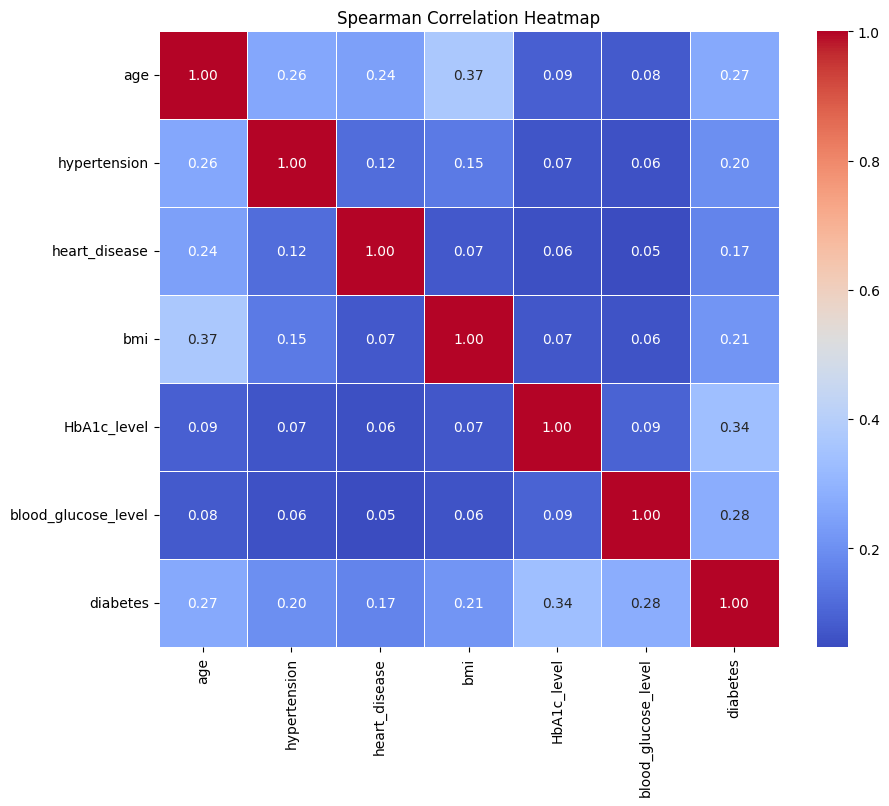

In [24]:
correlation_matrix_spearman = df.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [25]:
categorical_columns = ['diabetes', 'gender', 'hypertension', 'heart_disease', 'smoking_history']

# Create an empty DataFrame to store the chi-squared test results
chi2_results = []

# Perform the chi-squared test for each combination of columns
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        col1 = categorical_columns[i]
        col2 = categorical_columns[j]

        # Create the contingency table for the two columns
        contingency_table = pd.crosstab(df[col1], df[col2])

        # Perform the chi-squared test
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)

        # Append the results to the chi2_results list
        chi2_results.append({'Column1': col1, 'Column2': col2, 'Chi2': chi2, 'P-value': p})

# Create a DataFrame from the chi2_results list
chi2_results_df = pd.DataFrame(chi2_results)

# Display the chi-squared test results
print(chi2_results_df)

         Column1          Column2         Chi2        P-value
0       diabetes           gender   129.766220   4.609969e-30
1       diabetes     hypertension  3731.156391   0.000000e+00
2       diabetes    heart_disease  2782.003235   0.000000e+00
3       diabetes  smoking_history  1749.552657   0.000000e+00
4         gender     hypertension    19.120222   1.227375e-05
5         gender    heart_disease   585.930257  1.923713e-129
6         gender  smoking_history  1076.278253  1.832578e-230
7   hypertension    heart_disease  1379.161814  7.089824e-302
8   hypertension  smoking_history  1509.545624   0.000000e+00
9  heart_disease  smoking_history  1129.817507  4.663688e-242


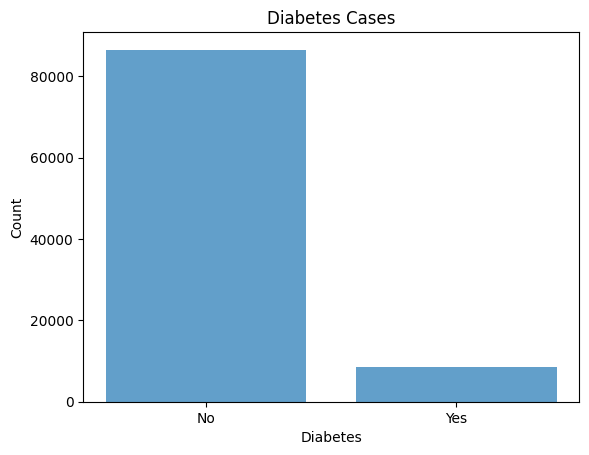

In [26]:
diabetes_counts = df['diabetes'].value_counts()
plt.bar(['No', 'Yes'], diabetes_counts, alpha=0.7)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Cases')
plt.show()

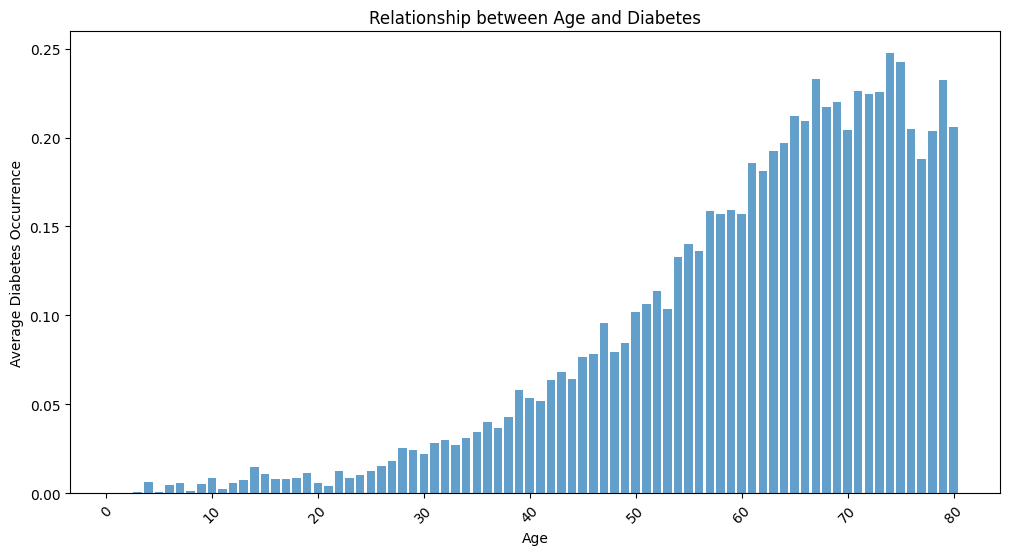

In [27]:
age_diabetes_avg = df.groupby('age')['diabetes'].mean()

plt.figure(figsize=(12, 6))
plt.bar(age_diabetes_avg.index, age_diabetes_avg.values, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Average Diabetes Occurrence')
plt.title('Relationship between Age and Diabetes')
plt.xticks(rotation=45)
plt.show()

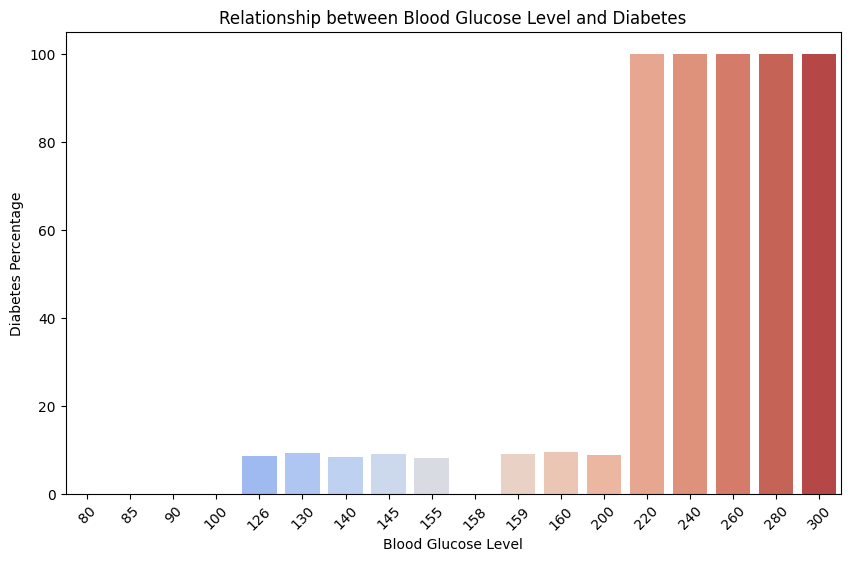

In [28]:
glucose_diabetes_percentage = df.groupby('blood_glucose_level')['diabetes'].mean().reset_index()
glucose_diabetes_percentage['diabetes'] *= 100  # Convert to percentage

# Create the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='blood_glucose_level', y='diabetes', data=glucose_diabetes_percentage, palette='coolwarm')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes Percentage')
plt.title('Relationship between Blood Glucose Level and Diabetes')
plt.xticks(rotation=45)
plt.show()

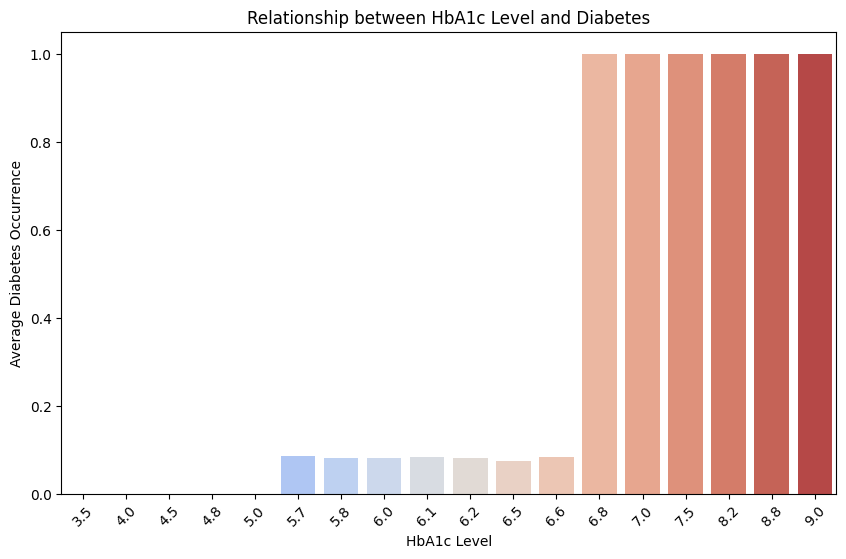

In [29]:
hba1c_diabetes_avg = df.groupby('HbA1c_level')['diabetes'].mean().reset_index()

# Create the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='HbA1c_level', y='diabetes', data=hba1c_diabetes_avg, palette='coolwarm')
plt.xlabel('HbA1c Level')
plt.ylabel('Average Diabetes Occurrence')
plt.title('Relationship between HbA1c Level and Diabetes')
plt.xticks(rotation=45)
plt.show()

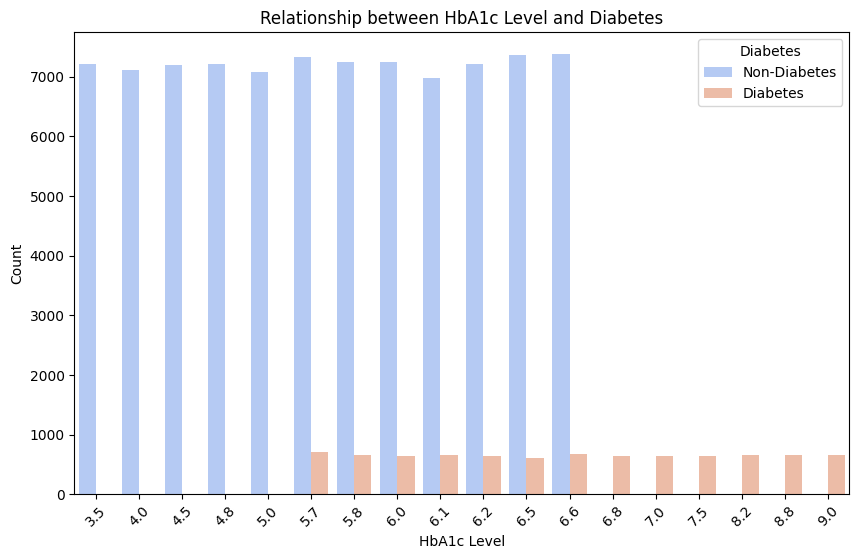

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HbA1c_level', hue='diabetes', data=df, palette='coolwarm')
plt.xlabel('HbA1c Level')
plt.ylabel('Count')
plt.title('Relationship between HbA1c Level and Diabetes')
plt.xticks(rotation=45)
plt.legend(title='Diabetes', labels=['Non-Diabetes', 'Diabetes'])
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95062 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95062 non-null  object 
 1   age                  95062 non-null  int64  
 2   hypertension         95062 non-null  int64  
 3   heart_disease        95062 non-null  int64  
 4   smoking_history      95062 non-null  object 
 5   bmi                  95062 non-null  float64
 6   HbA1c_level          95062 non-null  float64
 7   blood_glucose_level  95062 non-null  int64  
 8   diabetes             95062 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 7.3+ MB


# Modeling

In [32]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [33]:
categorical_features = ['gender', 'smoking_history']
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [34]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

In [35]:
X_prep = preprocessor.fit_transform(X)

In [36]:
# Get the updated column names for one-hot encoded features
cat_encoder = preprocessor.named_transformers_['cat']
one_hot_encoded_feature_names = cat_encoder.get_feature_names_out(input_features=categorical_features)

# Get the original numeric feature names
numeric_feature_names = numeric_features

# Concatenate the two lists of feature names to get the final list of column names after preprocessing
all_feature_names = list(one_hot_encoded_feature_names) + numeric_feature_names

# Convert X_prep (numpy array) to a pandas DataFrame with the updated column names
X_prep_df = pd.DataFrame(X_prep, columns=all_feature_names)

# Now you can see the updated column names in X_prep_df
print(X_prep_df.columns)

Index(['gender_Female', 'gender_Male', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current', 'age', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

In [38]:
model_reg = LogisticRegression(solver='liblinear', class_weight='balanced')
# Define the parameter grid
param = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0]  # Example values for the regularization strength C
}

# Perform grid search with cross-validation
gridSearch = GridSearchCV(model_reg, param, cv=5, scoring='recall', error_score='raise')
gridSearch.fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
print("Best hyperparameters:", gridSearch.best_params_)
print("Best recall:", gridSearch.best_score_)

Best hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Best recall: 0.8847407831611704


In [39]:
model = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=0.01)

In [40]:
model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [41]:
y_prob = model.predict_proba(X_test)[:,1]
threshold = 0.2
y_pred = (y_prob >= threshold).astype(int)
recall = recall_score(y_test, y_pred)

In [42]:
recall

0.9738095238095238

In [43]:
model.coef_

array([[-0.89112731, -0.5760078 , -0.68443439, -0.09519232, -0.09479317,
        -0.10762358, -0.24588875, -0.2392029 ,  1.14194276,  0.68522654,
         2.10053503,  1.21828068]])

In [44]:
df2 = df.drop('smoking_history', axis = 1)

In [45]:
X2 = df2.drop('diabetes', axis=1)
y2 = df2['diabetes']

In [46]:
categorical_features = ['gender']
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [47]:
preprocessor2 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

In [48]:
X_prep2 = preprocessor2.fit_transform(X2)

In [49]:
# Get the updated column names for one-hot encoded features
cat_encoder = preprocessor2.named_transformers_['cat']
one_hot_encoded_feature_names = cat_encoder.get_feature_names_out(input_features=categorical_features)

# Get the original numeric feature names
numeric_feature_names = numeric_features

# Concatenate the two lists of feature names to get the final list of column names after preprocessing
all_feature_names = list(one_hot_encoded_feature_names) + numeric_feature_names

# Convert X_prep (numpy array) to a pandas DataFrame with the updated column names
X_prep_diabetes2 = pd.DataFrame(X_prep2, columns=all_feature_names)

# Now you can see the updated column names in X_prep_df
print(X_prep_diabetes2.columns)

Index(['gender_Female', 'gender_Male', 'age', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')


In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_prep2, y2, test_size=0.2, random_state=42)

In [51]:
model_regression_l2_2 = LogisticRegression(solver='liblinear', class_weight = 'balanced', C = 0.01, penalty = 'l2')
model_regression_l2_2.fit(X_train2, y_train2)

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [52]:
y_pred2 = model_regression_l2_2.predict(X_test2)

In [53]:
recall_2 = recall_score(y_test2, y_pred2)
recall_2

0.8863095238095238

In [54]:
y_train_pred2 = model_regression_l2_2.predict(X_train2)

In [55]:
recall_2_train = recall_score(y_train2, y_train_pred2)
recall_2_train

0.8831226109967657

In [56]:
model_regression_l2_2.coef_

array([[-0.99815732, -0.67411137,  1.161389  ,  0.70079589,  2.09382068,
         1.215538  ]])

In [57]:
# gender_Female', 'gender_Male', 'age', 'bmi', 'HbA1c_level','blood_glucose_level'

In [58]:
Tree = DecisionTreeClassifier(class_weight = 'balanced')

param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1, 10)],
    'min_samples_leaf': [i for i in range(1, 10)]}

gridSearchTree = GridSearchCV(Tree, param, cv=5, scoring='recall')

In [59]:
gridSearchTree.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='recall')

In [60]:
print("The best estimator:", gridSearchTree.best_estimator_)

The best estimator: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5)


In [61]:
Tree1 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, class_weight = 'balanced')

In [62]:
Tree1.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=9)

In [63]:
y_pred2_tree = Tree1.predict(X_test2)

In [64]:
recall_2_tree = recall_score(y_test2, y_pred2_tree)
recall_2_tree

0.9160714285714285

In [65]:
y_train_pred2_tree = Tree1.predict(X_train2)

In [66]:
recall_2_tree_train = recall_score(y_train2, y_train_pred2_tree)
recall_2_tree_train

0.92046456924434